Part 1: Exploring Topics
1. Gradient Descent & Types of Gradient Descent
Gradient Descent is an optimization algorithm used to minimize a function, typically the loss function in machine learning. It works by iteratively adjusting the parameters of the model to minimize the loss.

Types of Gradient Descent:

Types of Gradient Descent:

Batch Gradient Descent:

Description: Uses the entire dataset to compute the gradient of the loss function with respect to the parameters. This means that the model parameters are updated only once per epoch.
Pros: Converges to the optimal solution as long as the learning rate is set appropriately.
Cons: Can be computationally expensive and slow for large datasets because it requires the whole dataset to be loaded into memory.


Stochastic Gradient Descent (SGD):

Description: Uses a single sample (or a small subset) to compute the gradient and update the parameters. This process is repeated for each sample in the dataset.
Pros: Faster updates and can escape local minima. It can be more efficient for large datasets.
Cons: The updates can be noisy and may lead to convergence issues, requiring careful tuning of learning rates.
Mini-batch Gradient Descent:

Description: A compromise between batch and stochastic gradient descent. It uses a small subset (mini-batch) of the dataset to compute the gradient and update the parameters.
Pros: Balances the efficiency of SGD with the stability of batch gradient descent. It is often faster and more efficient than both pure batch and pure stochastic gradient descent.
Cons: The choice of mini-batch size can impact the performance and convergence.
2. Validation Set & Validation Loss
Validation Set:

Description: A subset of the dataset that is used to evaluate the performance of a model during training. It is separate from the training set and helps in assessing how well the model generalizes to unseen data.
Purpose: Helps in tuning model hyperparameters and preventing overfitting by providing a check on the model’s performance.

Validation Loss:

Description: The loss value computed on the validation set. It provides a measure of how well the model is performing on data that it hasn't been trained on.
Purpose: Used to monitor the model's performance during training. If the validation loss starts increasing while the training loss decreases, it may indicate overfitting.

Part 2: Creating a MLP Model with Seaborn’s Tips Dataset
Let’s create a Multi-Layer Perceptron (MLP) model step by step using Python. We’ll use the tips dataset from the Seaborn library for this purpose.

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


In [5]:
tips = sns.load_dataset('tips')

print(tips.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Preprocess the Data:

Convert categorical variables to numerical values.
Split the data into features (X) and target (y).
Standardize the features.

In [11]:
# Load the tips dataset
tips = sns.load_dataset('tips')

# Convert categorical variables to dummy variables
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)


In [12]:
# Define features and target
X = tips.drop('tip', axis=1)  # Drop the 'tip' column for features
y = (tips['tip'] > tips['tip'].median()).astype(int)  # Binary target based on median tip


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)


In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the tips dataset
tips = sns.load_dataset('tips')

# Convert categorical variables to dummy variables
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Define features and target
X = tips.drop('tip', axis=1)  # Drop the 'tip' column for features
y = (tips['tip'] > tips['tip'].median()).astype(int)  # Binary target based on median tip

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)  # Transform test data


Build and Train the MLP Model:

In [16]:
# Initialize the MLP Classifier
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)


C:\Program Files\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

Evaluate the Model:

In [17]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        31
           1       0.61      0.78      0.68        18

    accuracy                           0.73        49
   macro avg       0.73      0.74      0.73        49
weighted avg       0.76      0.73      0.74        49



C:\Program Files\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        31
           1       0.61      0.78      0.68        18

    accuracy                           0.73        49
   macro avg       0.73      0.74      0.73        49
weighted avg       0.76      0.73      0.74        49



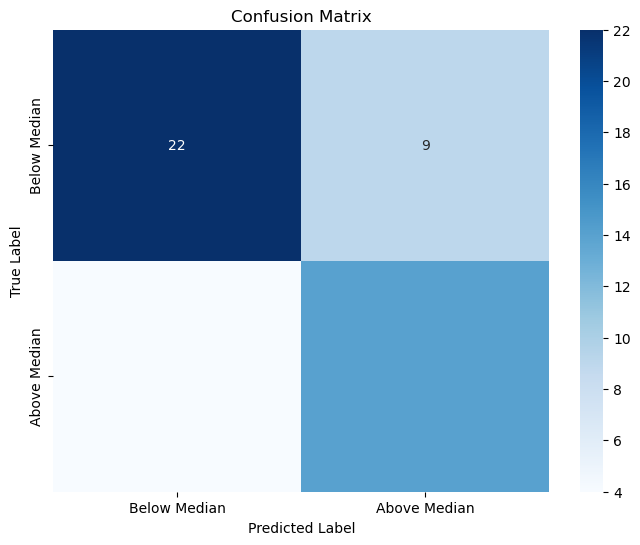

In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset('tips')

# Convert categorical variables to dummy variables
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Define features and target
X = tips.drop('tip', axis=1)  # Drop the 'tip' column for features
y = (tips['tip'] > tips['tip'].median()).astype(int)  # Binary target based on median tip

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)  # Transform test data

# Initialize and train the MLP Classifier
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Median', 'Above Median'], yticklabels=['Below Median', 'Above Median'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Summary
Gradient Descent: Used to minimize the loss function in machine learning models. Variants include Batch, Stochastic, and Mini-batch Gradient Descent.
Validation Set & Loss: Used to assess the model's performance and ensure it generalizes well to unseen data.
MLP Model: We demonstrated how to build, train, and evaluate a Multi-Layer Perceptron model using the Seaborn tips dataset, including preprocessing and performance evaluation.